In [6]:
using Pkg
Pkg.activate("..")

  Activating project at `d:\QuantumHarmonicBalance`


In [7]:
# using QuantumHarmonicBalance
using QuantumCumulants; QC = QuantumCumulants
import Plots
using ModelingToolkit, OrdinaryDiffEq

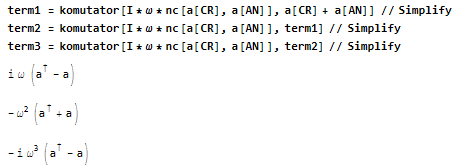

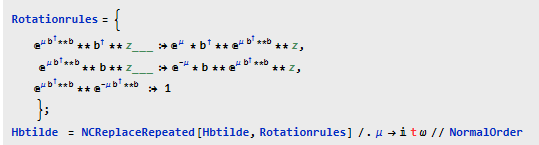

In [48]:
# Hilbert space
h = FockSpace(:cavity)

@cnumbers Δ F κ ω ω₀
@qnumbers a::Destroy(h)
@variables t::Real

1-element Vector{Num}:
 t

In [49]:
t |> typeof
# rnumber(:t)

Num

In [50]:
a |> typeof

Destroy{FockSpace{Symbol}, Symbol, Int64, Base.ImmutableDict{DataType, Any}}

In [40]:
empty_qmul() = QC.QMul(1.0, [])

empty_qmul (generic function with 1 method)

In [91]:
using QuantumCumulants: check_hilbert, QMul, QSym, Create, Destroy, simplify,QAdd

function rotate(input::QMul, a::QSym, ω=cnumber(:ω), t=rnumber(:t); extra_term=true)::QMul
    out = 1.0
    for arg in input.args_nc
        if arg isa Create
            out *= exp(-im*ω*t)*arg
        elseif arg isa Destroy
            out *= exp(im*ω*t)*arg
        else
            error("Unknown type: $(typeof(arg))")
        end
    end
    extra_term ? input.arg_c*simplify(out) - im*ω*a'*a : input.arg_c*simplify(out)
end
function rotate(input::QAdd, a::QSym; extra_term=true)

    sum(arg -> rotate(arg, a; extra_term=false), input.arguments) - im*ω*a'*a
end
function rotate(in::Create, a::QSym; extra_term=true)
    extra_term ? exp(-im*ω*t)*in - im*ω*a'*a : exp(-im*ω*t)*in 
end
function rotate(in::Destroy, a::QSym; extra_term=true)
    extra_term ? exp(im*ω*t)*in - im*ω*a'*a : exp(im*ω*t)*in 
end
rotate(input::Number, a::QSym; extra_term=true) = input - im*ω*a'*a


rotate (generic function with 7 methods)

In [92]:
expr = (a'+a)^4 |> simplify
rot = rotate(expr, a)

(6*(a′*a′*a*a)+6exp((0 + 2im)*t*ω)*(a*a)+6exp((0 - 2im)*t*ω)*(a′*a′)+(0 - 1im)*ω*(a′*a)+3+4exp((0 - 2im)*t*ω)*(a′*a′*a′*a)+4exp((0 + 2im)*t*ω)*(a′*a*a*a)+exp((0 + 4im)*t*ω)*(a*a*a*a)+exp((0 - 4im)*t*ω)*(a′*a′*a′*a′)+12*(a′*a)+(0 - 1im)*ω*(a′*a))

In [88]:
rot.arguments

3-element Vector{Any}:
 3exp((0 - 1im)*t*ω)*(a′)
 3exp((0 + 1im)*t*ω)*(a)
 (0 - 3im)*ω*(a′*a)